Importing Libraries

In [1]:
import pandas as pd
import numpy as np

Uploading Dataset

In [2]:
df=pd.read_csv('spam.csv',encoding='ISO-8859-1')

Data Preprocessing

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df=df.dropna(axis=1)

In [6]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='v1', ylabel='count'>

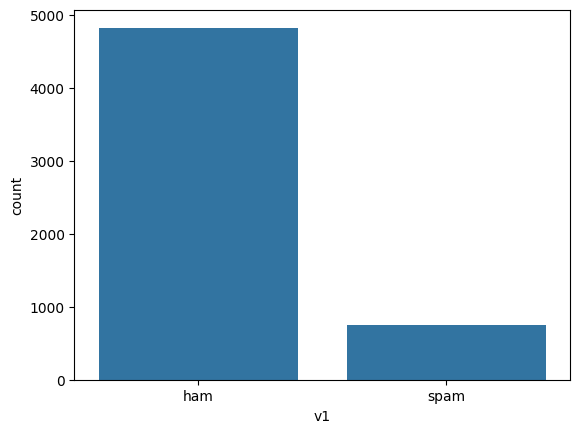

In [8]:
sns.countplot(data=df,x='v1')

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['v1'] = label_encoder.fit_transform(df['v1'])


In [10]:
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Length: 5572, dtype: bool

Formatting Text

In [12]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.preprocessing import LabelEncoder
nltk.download('stopwords')

# Initialize objects
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Remove stop words and perform stemming
    text = ' '.join([ps.stem(word) for word in text.split() if word not in stop_words])
    return text

df['cleaned_text'] = df['v2'].apply(preprocess_text)

print(df[['v2', 'cleaned_text', 'v1']].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aryan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                  v2  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                        cleaned_text  v1  
0  go jurong point crazi avail bugi n great world...   0  
1                              ok lar joke wif u oni   0  
2  free entri 2 wkli comp win fa cup final tkt 21...   1  
3                u dun say earli hor u c alreadi say   0  
4          nah dont think goe usf live around though   0  


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=3000)  # You can adjust max_features as needed

# Fit and transform the cleaned text data
X = tfidf.fit_transform(df['cleaned_text']).toarray()

# Target variable
y = df['v1']


Model Training

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the model
model = MultinomialNB()

# Train the model
model.fit(X_train, y_train)


MultinomialNB()

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions
y_pred = model.predict(X_test)
y_pred


array([0, 0, 1, ..., 0, 0, 1])

Accuracy

In [17]:
acc=model.score(X_test,y_test)
acc*100

97.847533632287